In [1]:
import csv
import pandas as pd
import numpy as np
import datetime as dtime
import matplotlib.pyplot as plt
import numpy as np

#  url="https://covid.ourworldindata.org/data/owid-covid-data.csv" Data from 'Our World in Data' webpage

# create data frame from the csv file
covid_df = pd.read_csv(r'https://covid.ourworldindata.org/data/owid-covid-data.csv', delimiter=",", encoding="utf-8", header=0)

# covid_df.head()


#  DATA by continents

In [ ]:
#Data frame
covid_df_continents = covid_df[["continent", "location", "date", "total_cases", "new_cases", "total_deaths", "new_deaths"]]

# continent = input("Choose continent(caps letter needed), options: Asia, Europe, North America, South America, Africa, Oceania")
continent_sel = "Europe"
covid_df_continents = covid_df_continents[covid_df_continents.continent == continent_sel]

#todays date
today_date = np.datetime64(dtime.date.today())
print("Today is:", today_date)
print(type(today_date))

#lets try passing date in the data frame to datetime type
covid_df_continents['date'] = pd.to_datetime(covid_df_continents['date'], format="%Y-%m-%d")
#covid_df_continents.info()
covid_df_continents.set_index("date", inplace = True)#.sort_values(by = "date")


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


Text(0.5, 1.0, 'Total cases time-series Europe')

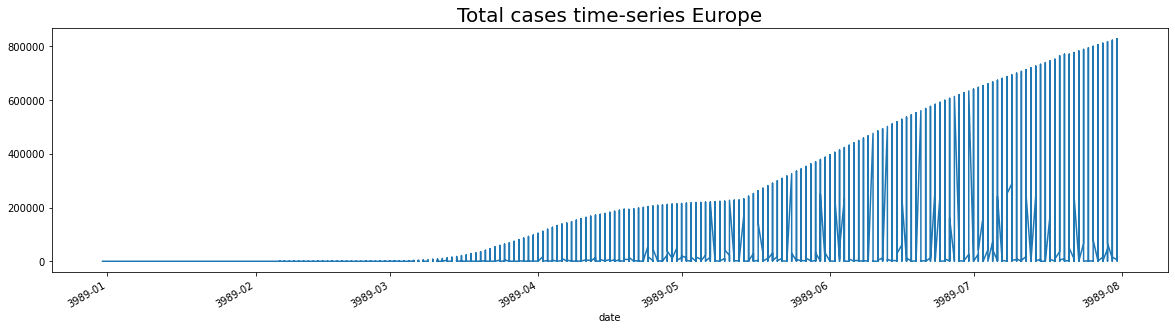

In [3]:
covid_df_continents["total_cases"].plot(figsize = (20,5))
plt.title("Total cases time-series " + continent_sel, size=20)

In [ ]:
fig, (t_ax1, t_ax2) = plt.subplots(1, 2, figsize=(28, 12)) #starting plots

#TOTAL CASES DATA
covid_df_continents["total_cases"].plot(linewidth=1, label=continent_sel, ax=t_ax1)  
covid_df_continents["total_cases"].plot(kind='bar', label=continent_sel, ax=t_ax1)


#NEW CASES DATA
covid_df_continents["new_cases"].plot(linewidth=1, label=continent_sel, ax=t_ax2)  
covid_df_continents["new_cases"].plot(kind='bar', label=continent_sel, ax=t_ax2)


# PLOT LABELS
t_ax1.set_ylabel("Total Cases")
t_ax2.set_ylabel("New Cases")

t_ax1.set_xlabel("date")
t_ax2.set_xlabel("date")

t_ax1.legend()
t_ax2.legend()

fig.show()

# covid_df_continents.head(100)


# COUNTRY DATA

In [ ]:
#DATA FRAME
covid_df_country = covid_df[["continent", "location", "date", "total_cases", "new_cases", "total_deaths", "new_deaths"]]

# country = input("choose country, "World" is also an option:")
country = "Spain"

# days = input("How many days from today?")
days = 120
days = int(days)

covid_df_country = covid_df_countries[covid_df_countries.location == country]
covid_df_country.set_index("date", inplace = True)
# covid_df_selectedcountry.head()  #SMALL CHECK

# eliminamos los dias sin datos
for i in covid_df_country.total_cases[:]:
    if i == "":
        i = 0
        
for j in covid_df_country.new_cases[:]:
    if j == "":
        j = 0

fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6)) #starting plots

#TOTAL CASES DATA
covid_df_country.total_cases[-days:].plot(linewidth=1, ax=ax1, label=country)  
covid_df_country.total_cases[-days:].plot(kind='bar', label=country, ax=ax1)


#NEW CASES DATA
covid_df_country.new_cases[-days:].plot(linewidth=1, label=country, ax=ax2)  
covid_df_country.new_cases[-days:].plot(kind='bar', label=country, ax=ax2)


# PLOT LABELS
ax1.set_ylabel("Total Cases")
ax2.set_ylabel("New Cases")

ax1.set_xlabel("Date")
ax2.set_xlabel("Date")

ax1.legend()
ax2.legend()

plt.show()